In [1]:
import pandas as pd

In [2]:
#!pip install nsepy

In [3]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2

In [5]:
#!pip install yfinance

In [6]:
import yfinance as yf

In [7]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420471,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748413,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050293,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [10]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420471,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748413,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050293,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [11]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [12]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [13]:
column="Close"

In [14]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [15]:
len(data1)

143

In [16]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [17]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)

    for td in trends:

        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.1590673304814868
maPe-Testset: 0.8457722690454456
************
Lag=1,Trend=t
RMSE-Testset: 0.16295928192209705
maPe-Testset: 0.8486837398224761
************
Lag=1,Trend=c
RMSE-Testset: 0.160709656889677
maPe-Testset: 0.9755009016955164
************
Lag=1,Trend=ct
RMSE-Testset: 0.17848497333129823
maPe-Testset: 0.8616580186123898
************
Lag=2,Trend=n
RMSE-Testset: 0.16562577486117894
maPe-Testset: 0.8546394237167315
************
Lag=2,Trend=t
RMSE-Testset: 0.14793101477208517
maPe-Testset: 0.8777496664581863
************
Lag=2,Trend=c
RMSE-Testset: 0.18425603406011012
maPe-Testset: 1.1139964077633457
************
Lag=2,Trend=ct
RMSE-Testset: 0.1646116254157871
maPe-Testset: 0.8761788145588706
************
Lag=3,Trend=n
RMSE-Testset: 0.16348500633516225
maPe-Testset: 0.8376811729010358
************
Lag=3,Trend=t
RMSE-Testset: 0.14839214197591552
maPe-Testset: 0.8376404454973401
************
Lag=3,Trend=c
RMSE-Testset: 0.16823655634770832
maPe-Testset: 

In [18]:
len(y_pred)

29

In [19]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.17848497333129823
maPe-Testset: 0.8616580186123898
************


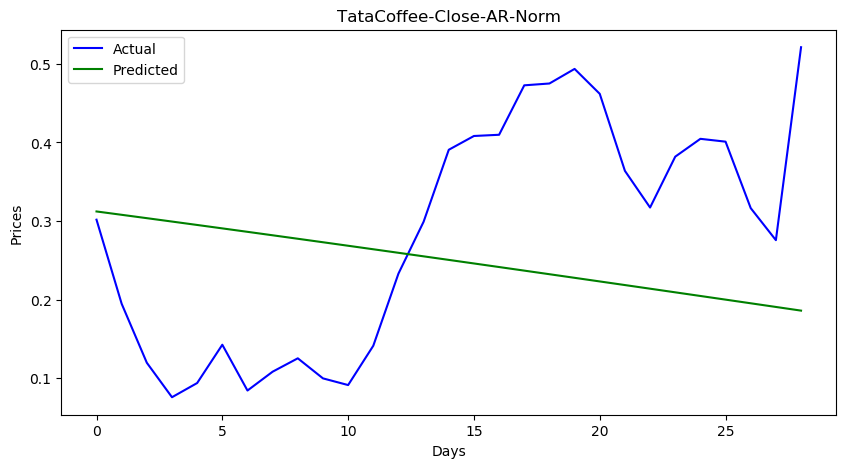

In [20]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [21]:
len(data1)

143

In [22]:
y_test

array([[0.30180438],
       [0.19484561],
       [0.11984536],
       [0.07603093],
       [0.09407216],
       [0.14278357],
       [0.08453621],
       [0.10850541],
       [0.12551565],
       [0.10000013],
       [0.09149485],
       [0.14149491],
       [0.23324742],
       [0.29922706],
       [0.3907219 ],
       [0.40824749],
       [0.40979381],
       [0.47268048],
       [0.47500013],
       [0.4935567 ],
       [0.46185586],
       [0.36391771],
       [0.31726829],
       [0.38195895],
       [0.40463918],
       [0.40103118],
       [0.31649497],
       [0.2757732 ],
       [0.52113421]])

In [23]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [24]:
aTestNormTable

,Close
0,0.301804
1,0.194846
2,0.119845
3,0.076031
4,0.094072
5,0.142784
6,0.084536
7,0.108505
8,0.125516
9,0.1


In [25]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [26]:
actual_stock_price_test_ori

array([[709.65002441],
       [688.90002441],
       [674.34997559],
       [665.84997559],
       [669.34997559],
       [678.79998779],
       [667.5       ],
       [672.15002441],
       [675.45001221],
       [670.5       ],
       [668.84997559],
       [678.54998779],
       [696.34997559],
       [709.15002441],
       [726.90002441],
       [730.29998779],
       [730.59997559],
       [742.79998779],
       [743.25      ],
       [746.84997559],
       [740.70001221],
       [721.70001221],
       [712.65002441],
       [725.20001221],
       [729.59997559],
       [728.90002441],
       [712.5       ],
       [704.59997559],
       [752.20001221]])

In [27]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [28]:
actual_stock_price_test_oriA

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.5
7,672.150024
8,675.450012
9,670.5


In [29]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [30]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

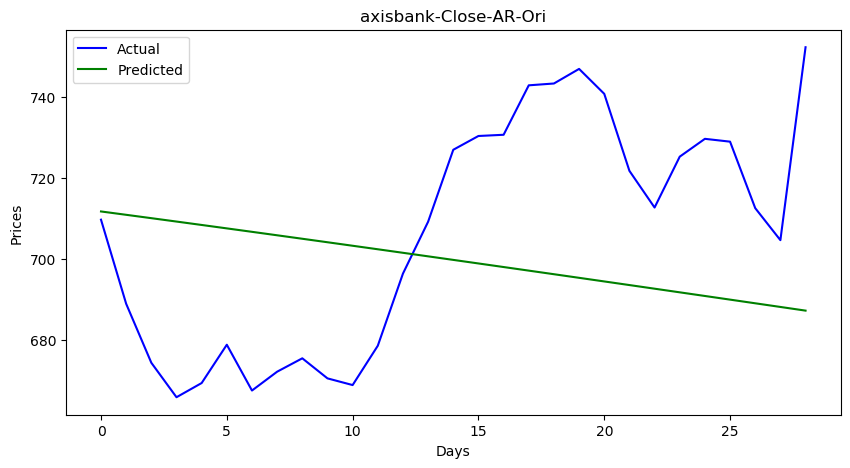

In [39]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","axisbank-Close-AR-Ori","Days","Prices")

In [32]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 34.626084826271864
maPe-Testset: 0.045024692660282375


In [33]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [34]:
forecast

array([0.18148725, 0.17680413, 0.17211441, 0.16741842])

In [35]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [36]:
forecast_stock_price_test_oriF

,Closefore
0,686.308503
1,685.399976
2,684.490171
3,683.579148


In [37]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

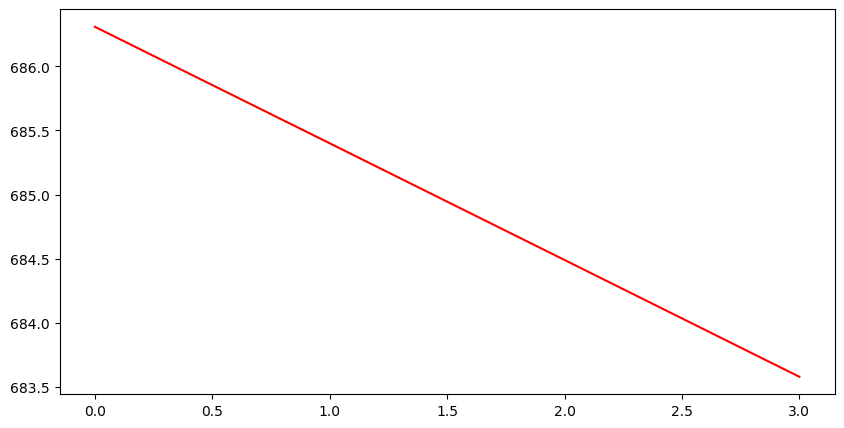

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")